In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df1=pd.read_csv("diabetes.csv")

In [49]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

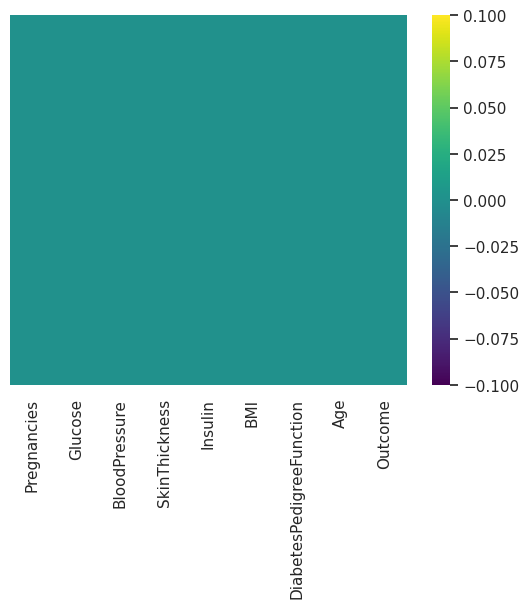

In [51]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

<Axes: >

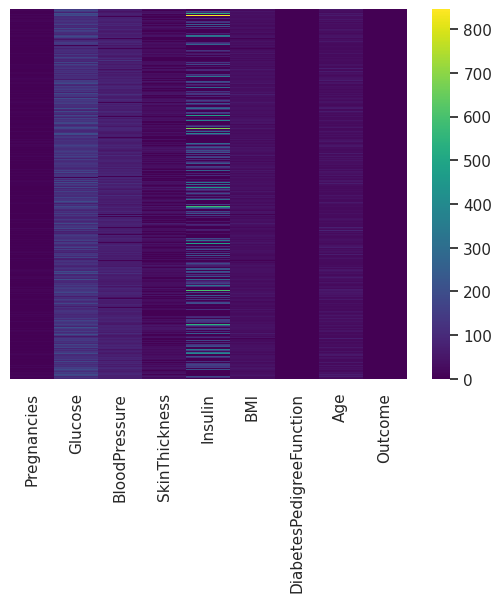

In [52]:
sns.heatmap(df1,yticklabels=False,cmap='viridis')

In [53]:
sns.set_style('whitegrid')

<Axes: xlabel='Outcome', ylabel='count'>

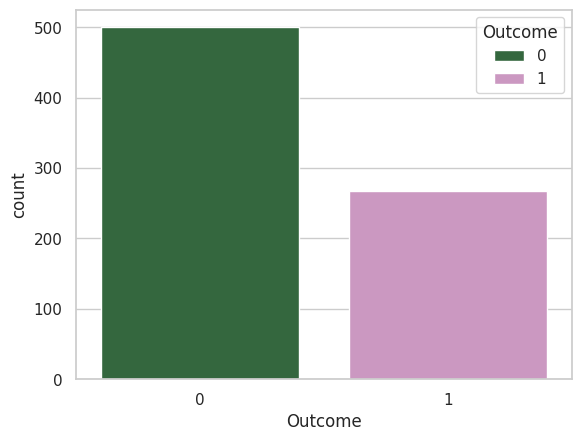

In [54]:
sns.countplot(x='Outcome',hue='Outcome',data=df1,palette='cubehelix')

Text(0.5, 0, 'Outcome')

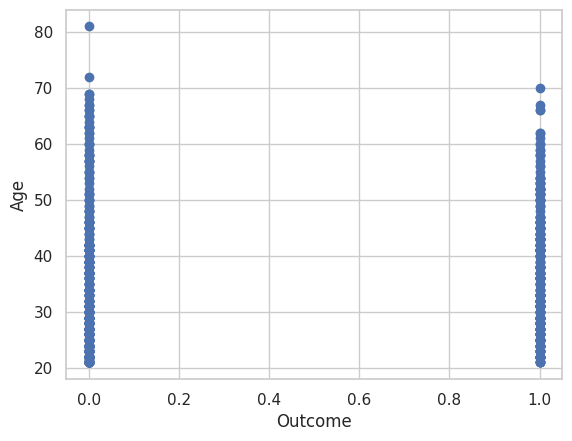

In [55]:
plt.scatter(x='Outcome',y='Age',data=df1)
plt.ylabel('Age')
plt.xlabel('Outcome')

<ipython-input-56-eda18a4c5ef6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'],kde=False,color='darkblue',bins=30)


<Axes: xlabel='Age'>

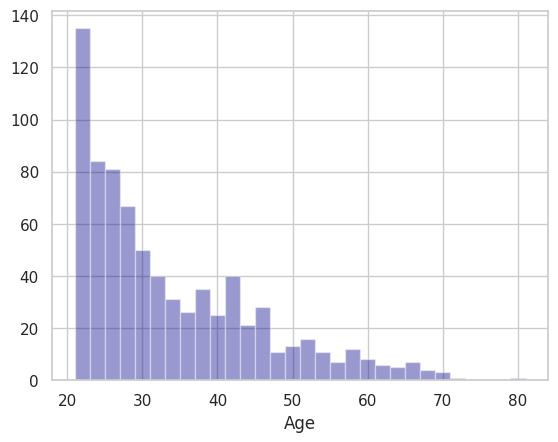

In [56]:
sns.distplot(df1['Age'],kde=False,color='darkblue',bins=30)

<ipython-input-57-ef71cc68597c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['BloodPressure'],kde=False,color='royalblue',bins=20)


<Axes: xlabel='BloodPressure'>

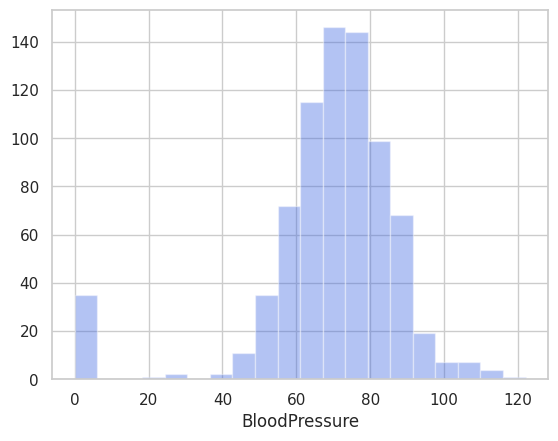

In [57]:
sns.distplot(df1['BloodPressure'],kde=False,color='royalblue',bins=20)

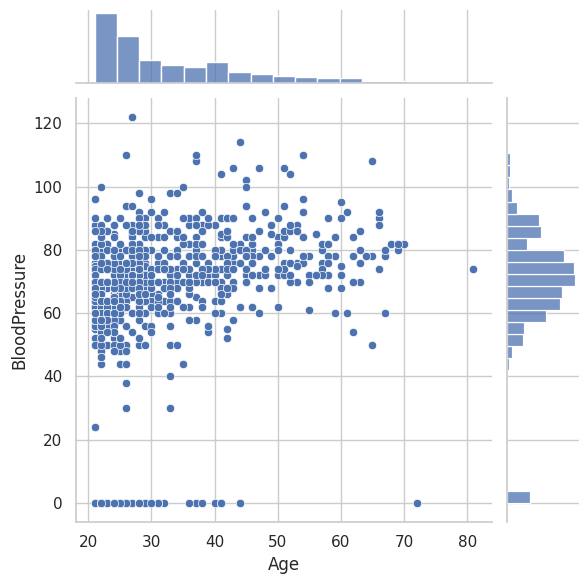

In [58]:
sns.jointplot(x='Age',y='BloodPressure',data=df1)

# **Model Training**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
X = df1.drop('Outcome', axis = 1)
y = df1['Outcome']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis=1),df1['Outcome'],test_size=0.20,random_state=101)

# **Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)
predictions_logistic = LRModel.predict(X_test)
print(classification_report(y_test, predictions_logistic))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7597402597402597


# Random Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
random_forest_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_train = random_forest_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy (Random Forest Classifier):", accuracy_train)

Training Accuracy (Random Forest Classifier): 1.0


In [69]:
predictions_diabetes=random_forest_classifier.predict(X_test)

In [70]:
# paitentid_54=pd.DataFrame([1,123,126,60,0,30.1,0.349,47],columns=x)
#Defining a sample data to test the model
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[0,170,126,60,35,30.1,0.649,78]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,170,126,60,35,30.1,0.649,78


In [71]:
predictions_diabetes=random_forest_classifier.predict(paitentid_54)

In [72]:
print(predictions_diabetes)

[1]
